In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Define class names and labels
class_names = ["combat", "destroyedbuilding", "fire", "humanitarianaid", "militaryvehicles"]
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

# Define image and batch size
image_size = (150, 150)
batch_size = 32

# Data augmentation and preprocessing
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data_dir = "training"
test_data_dir = "testing"  # Updated path to the testing folder

train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=class_names
)

validation_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=class_names
)

# Build and compile the model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

model = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

# Save the trained model
model.save("alien_attack_model.h5")

# Load the trained model for testing
model = keras.models.load_model("alien_attack_model.h5")

# Prepare the test data
test_data_gen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_data_gen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=1,
    class_mode=None,  # Set to None to return images as they are
    shuffle=False
)

# Make predictions on test data
test_predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = [class_names[i] for i in np.argmax(test_predictions, axis=1)]

# Display the predicted class labels for each test image
for i, image_path in enumerate(test_generator.filepaths):
    filename = os.path.basename(image_path)  # Extract the filename
    class_name = predicted_labels[i]
    print(f"Image: {filename}, Predicted Class: {class_name}")


Found 320 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Epoch 1/10
10/10 [==============================] - 13s 1s/step - loss: 2.1897 - accuracy: 0.3469 - val_loss: 1.5473 - val_accuracy: 0.4750
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 1.4095 - accuracy: 0.4375 - val_loss: 0.8958 - val_accuracy: 0.6625
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 0.9540 - accuracy: 0.6281 - val_loss: 0.8697 - val_accuracy: 0.7500
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 0.8653 - accuracy: 0.6687 - val_loss: 0.6923 - val_accuracy: 0.7500
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 0.7334 - accuracy: 0.7281 - val_loss: 0.6267 - val_accuracy: 0.7625
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 0.6664 - accuracy: 0.7594 - val_loss: 0.5866 - val_accuracy: 0.7875
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 0.7152 

In [1]:
import os

# Define the folder paths for each class in the training dataset
train_combat_dir = r"C:\Users\gupta\Desktop\Task 2A\training\Combat"
train_destroyedbuilding_dir = r"C:\Users\gupta\Desktop\Task 2A\training\DestroyedBuildings"
train_fire_dir = r"C:\Users\gupta\Desktop\Task 2A\training\Fire"
train_humanitarianaid_dir = r"C:\Users\gupta\Desktop\Task 2A\training\Humanitarian Aid and rehabilitation"
train_militaryvehicles_dir = r"C:\Users\gupta\Desktop\Task 2A\training\Military vehicles and weapons"

# Define the folder paths for each class in the testing dataset
test_combat_dir = r"C:\Users\gupta\Desktop\Task 2A\testing\combat"
test_destroyedbuilding_dir = r"C:\Users\gupta\Desktop\Task 2A\testing\destroyedbuilding"
test_fire_dir = r"C:\Users\gupta\Desktop\Task 2A\testing\fire"
test_humanitarianaid_dir = r"C:\Users\gupta\Desktop\Task 2A\testing\humanitarianaid"
test_militaryvehicles_dir = r"C:\Users\gupta\Desktop\Task 2A\testing\militaryvehicles" 


# Function to count the number of images in a folder
def count_images_in_folder(folder_path):
    return len(os.listdir(folder_path))

# Count the number of images in each class
train_combat_count = count_images_in_folder(train_combat_dir)
train_destroyedbuilding_count = count_images_in_folder(train_destroyedbuilding_dir)
train_fire_count = count_images_in_folder(train_fire_dir)
train_humanitarianaid_count = count_images_in_folder(train_humanitarianaid_dir)
train_militaryvehicles_count = count_images_in_folder(train_militaryvehicles_dir)

test_combat_count = count_images_in_folder(test_combat_dir)
test_destroyedbuilding_count = count_images_in_folder(test_destroyedbuilding_dir)
test_fire_count = count_images_in_folder(test_fire_dir)
test_humanitarianaid_count = count_images_in_folder(test_humanitarianaid_dir)
test_militaryvehicles_count = count_images_in_folder(test_militaryvehicles_dir)

# Print the counts
print("Training Data:")
print(f"Combat: {train_combat_count} images")
print(f"Destroyed Building: {train_destroyedbuilding_count} images")
print(f"Fire: {train_fire_count} images")
print(f"Humanitarian Aid: {train_humanitarianaid_count} images")
print(f"Military Vehicles: {train_militaryvehicles_count} images")

print("\nTesting Data:")
print(f"Combat: {test_combat_count} images")
print(f"Destroyed Building: {test_destroyedbuilding_count} images")
print(f"Fire: {test_fire_count} images")
print(f"Humanitarian Aid: {test_humanitarianaid_count} images")
print(f"Military Vehicles: {test_militaryvehicles_count} images")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\gupta\\Desktop\\Task 2A\\training\\Combat'

In [36]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Define class names and labels
class_names = ["combat", "destroyedbuilding", "fire", "humanitarianaid", "militaryvehicles"]
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

# Define image and batch size
image_size = (150, 150)
batch_size = 32

# Data augmentation and preprocessing
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data_dir = "training"
test_data_dir = "testing"  # Updated path to the testing folder

train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=class_names
)

validation_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=class_names
)

# Build and compile the model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

model = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

# Save the trained model
model.save("alien_attack_model.h5")

# Load the trained model for testing
model = keras.models.load_model("alien_attack_model.h5")

# Prepare the test data
test_data_gen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_data_gen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=1,
    class_mode=None,  # Set to None to return images as they are
    shuffle=False
)

# Make predictions on test data
test_predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = [class_names[i] for i in np.argmax(test_predictions, axis=1)]

# Display the predicted class labels for each test image
for i, image_path in enumerate(test_generator.filepaths):
    filename = os.path.basename(image_path)  # Extract the filename
    class_name = predicted_labels[i]
    print(f"Image: {filename}, Predicted Class: {class_name}")


Found 320 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Epoch 1/10
10/10 [==============================] - 15s 1s/step - loss: 2.2004 - accuracy: 0.3250 - val_loss: 1.1160 - val_accuracy: 0.5875
Epoch 2/10
10/10 [==============================] - 15s 1s/step - loss: 1.2701 - accuracy: 0.5000 - val_loss: 0.8618 - val_accuracy: 0.7000
Epoch 3/10
10/10 [==============================] - 14s 1s/step - loss: 0.9892 - accuracy: 0.6313 - val_loss: 0.7564 - val_accuracy: 0.7750
Epoch 4/10
10/10 [==============================] - 14s 1s/step - loss: 0.8883 - accuracy: 0.6719 - val_loss: 0.6721 - val_accuracy: 0.7500
Epoch 5/10
10/10 [==============================] - 14s 1s/step - loss: 0.7230 - accuracy: 0.7250 - val_loss: 0.7085 - val_accuracy: 0.7625
Epoch 6/10
10/10 [==============================] - 14s 1s/step - loss: 0.7108 - accuracy: 0.7125 - val_loss: 0.4985 - val_accuracy: 0.8125
Epoch 7/10
10/10 [==============================] - 14s 1s/step - loss: 0.6530 

In [1]:
#ModelNormal
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D

# Define class names and labels
class_names = ["combat", "destroyedbuilding", "fire", "humanitarianaid", "militaryvehicles"]
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

# Define image and batch size
image_size = (224, 224)  # Changed to match DenseNet201 input size
batch_size = 32

# Data augmentation and preprocessing
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    shear_range=0.3,  # Increased shear range
    zoom_range=0.3,  # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data_dir = "training"
test_data_dir = "testing"  # Updated path to the testing folder

train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=class_names
)

validation_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=class_names
)

# Build and compile the model (DenseNet201)
base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Changed to Global Average Pooling
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
for layer in base_model.layers[-10:]:  # Fine-tuning last few layers
    layer.trainable = True

# Training with a learning rate scheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    return 0.001 * np.exp(-epoch / 10)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
lr_callback = LearningRateScheduler(lr_scheduler)

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[lr_callback, early_stopping]
)

# Save the trained model
model.save("alien_attack_model.h5")

# Load the trained model for testing
model = keras.models.load_model("alien_attack_model.h5")

# Prepare the test data
test_data_gen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_data_gen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Make predictions on test data
test_predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = [class_names[i] for i in np.argmax(test_predictions, axis=1)]

# Display the predicted class labels for each test image
for i, image_path in enumerate(test_generator.filepaths):
    filename = os.path.basename(image_path)
    class_name = predicted_labels[i]
    print(f"Image: {filename}, Predicted Class: {class_name}")


C:\Users\gupta\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 320 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Epoch 1/20
10/10 [==============================] - 46s 4s/step - loss: 1.5518 - accuracy: 0.4563 - val_loss: 0.6724 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 31s 3s/step - loss: 0.8503 - accuracy: 0.6844 - val_loss: 0.2446 - val_accuracy: 0.9125 - lr: 9.0484e-04
Epoch 3/20
10/10 [==============================] - 30s 3s/step - loss: 0.5029 - accuracy: 0.8156 - val_loss: 0.1433 - val_accuracy: 0.9625 - lr: 8.1873e-04
Epoch 4/20
10/10 [==============================] - 31s 3s/step - loss: 0.3677 - accuracy: 0.8844 - val_loss: 0.1714 - val_accuracy: 0.9500 - lr: 7.4082e-04
Epoch 5/20
10/10 [==============================] - 32s 3s/step - loss: 0.4201 - accuracy: 0.8594 - val_loss: 0.1211 - val_accuracy: 0.9500 - lr: 6.7032e-04
Epoch 6/20
10/10 [==============================] - 30s 3s/step - loss: 0.2474 - accuracy: 0.9187 - val_loss: 0.2061 - val_accuracy: 0.925

In [8]:
#image Preprocessing
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import cv2

# Define custom preprocessing functions
def adjust_color_balance(image, alpha=1.2, beta=10):
    result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return np.clip(result, 0, 255).astype(np.uint8)

def gamma_correction(image, gamma=1.2):
    table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def preprocess_image(image):
    # Apply your custom preprocessing steps
    image = adjust_color_balance(image, alpha=1.2, beta=10)
    image = gamma_correction(image, gamma=1.2)
    image = cv2.medianBlur(image, 3)  # Uncomment if you want to apply median blur
    return image

# Define class names and labels
class_names = ["combat", "destroyedbuilding", "fire", "humanitarianaid", "militaryvehicles"]
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

# Define image and batch size
image_size = (224, 224)  # Changed to match DenseNet201 input size
batch_size = 32

# Data augmentation and preprocessing
train_data_gen = ImageDataGenerator(
    rescale=None,
    rotation_range=50,  # Increased rotation range
    width_shift_range=0.4,  # Increased width shift range
    height_shift_range=0.4,  # Increased height shift range
    shear_range=0.4,  # Increased shear range
    zoom_range=0.4,  # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function=preprocess_image  # Apply custom preprocessing
)

train_data_dir = "training"
test_data_dir = "testing"

train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=class_names
)

validation_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=class_names
)

# Build and compile the model (DenseNet201)
base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers[-(len(base_model.layers) - 10):]:
    layer.trainable = True


model = keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),  # Increase the number of units
    Dropout(0.5),  # Add dropout for regularization
    Dense(256, activation='relu'),  # Add another dense layer
    Dropout(0.3),  # Add dropout for regularization
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Training with a learning rate scheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    return 0.001 * np.exp(-epoch / 10)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
lr_callback = LearningRateScheduler(lr_scheduler)

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[lr_callback, early_stopping]
)

# Save the trained model
model.save("alien_attack_model.h5")

# Load the trained model for testing
model = keras.models.load_model("alien_attack_model.h5")

# Prepare the test data
test_data_gen = ImageDataGenerator(rescale=None, preprocessing_function=preprocess_image)
test_generator = test_data_gen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Make predictions on test data
test_predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = [class_names[i] for i in np.argmax(test_predictions, axis=1)]

# Display the predicted class labels for each test image
for i, image_path in enumerate(test_generator.filepaths):
    filename = os.path.basename(image_path)
    class_name = predicted_labels[i]
    print(f"Image: {filename}, Predicted Class: {class_name}")


Found 325 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Epoch 1/50
11/11 [==============================] - 221s 14s/step - loss: 1.3781 - accuracy: 0.4923 - val_loss: 283.7086 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 2/50
11/11 [==============================] - 132s 12s/step - loss: 1.0685 - accuracy: 0.6431 - val_loss: 977.1644 - val_accuracy: 0.2125 - lr: 9.0484e-04
Epoch 3/50
11/11 [==============================] - 136s 12s/step - loss: 1.1796 - accuracy: 0.5692 - val_loss: 49.5777 - val_accuracy: 0.1375 - lr: 8.1873e-04
Epoch 4/50
11/11 [==============================] - 145s 13s/step - loss: 0.9203 - accuracy: 0.6646 - val_loss: 57.1243 - val_accuracy: 0.2625 - lr: 7.4082e-04
Epoch 5/50
11/11 [==============================] - 157s 14s/step - loss: 0.9711 - accuracy: 0.7169 - val_loss: 62.9740 - val_accuracy: 0.2375 - lr: 6.7032e-04
Epoch 6/50
11/11 [==============================] - 162s 15s/step - loss: 0.9410 - accuracy: 0.6831 - val_loss: 24.9476 -

In [3]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight

# Define class names and labels
class_names = ["combat", "destroyedbuilding", "fire", "humanitarianaid", "militaryvehicles"]
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

# Define custom preprocessing functions
def adjust_color_balance(image, alpha=1.2, beta=10):
    result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return np.clip(result, 0, 255).astype(np.uint8)

def gamma_correction(image, gamma=1.2):
    table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)
Ndef preprocess_image(image):
    # Apply your custom preprocessing steps
    image = adjust_color_balance(image, alpha=1.2, beta=10)
    image = gamma_correction(image, gamma=1.2)
    image = cv2.medianBlur(image, 3)  # Uncomment if you want to apply median blur
    return image

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

train_data_dir = "training"
test_data_dir = "testing"

train_data_gen = ImageDataGenerator(rescale=None,preprocessing_function=preprocess_image)
test_data_gen = ImageDataGenerator(rescale=None,preprocessing_function=preprocess_image)

train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=class_names
)

validation_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=class_names
)

# Build and compile the model (DenseNet201)
base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Fine-tune more layers
for layer in base_model.layers[-50:]:
    layer.trainable = True

model = keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.6),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(class_names), activation='softmax')
])

# Use class weights to handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = {i: class_weights[i] for i in range(len(class_names))}
print("Class Weights:", class_weights_dict)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjust learning rate
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Training with a learning rate scheduler
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    return 0.0001 * np.exp(-epoch / 10)

lr_callback = LearningRateScheduler(lr_scheduler)

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Use class weights during training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[lr_callback, early_stopping],
    class_weight=class_weights_dict 
)

# Save the trained model
model.save("alien_attack_model.h5")

# Load the trained model for testing
model = keras.models.load_model("alien_attack_model.h5")

# Prepare the test data
test_generator = test_data_gen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Make predictions on test data
test_predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = [class_names[i] for i in np.argmax(test_predictions, axis=1)]

# Display the predicted class labels for each test image
for i, image_path in enumerate(test_generator.filepaths):
    filename = os.path.basename(image_path)
    class_name = predicted_labels[i]
    print(f"Image: {filename}, Predicted Class: {class_name}")


Found 405 images belonging to 5 classes.
Found 0 images belonging to 5 classes.
Class Weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}
Epoch 1/15
13/13 [==============================] - 203s 12s/step - loss: 1.6152 - accuracy: 0.3531 - lr: 1.0000e-04
Epoch 2/15
13/13 [==============================] - 160s 13s/step - loss: 0.7933 - accuracy: 0.7457 - lr: 9.0484e-05
Epoch 3/15
13/13 [==============================] - 153s 12s/step - loss: 0.4422 - accuracy: 0.8765 - lr: 8.1873e-05
Epoch 4/15
13/13 [==============================] - 158s 12s/step - loss: 0.2379 - accuracy: 0.9556 - lr: 7.4082e-05
Epoch 5/15
13/13 [==============================] - 158s 12s/step - loss: 0.2098 - accuracy: 0.9358 - lr: 6.7032e-05
Epoch 6/15
13/13 [==============================] - 157s 12s/step - loss: 0.1119 - accuracy: 0.9728 - lr: 6.0653e-05
Epoch 7/15
13/13 [==============================] - 157s 12s/step - loss: 0.0813 - accuracy: 0.9901 - lr: 5.4881e-05
Epoch 8/15
13/13 [===========================

In [10]:
import sklearn
print(sklearn.__version__)

1.0.2


In [4]:
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
true_labels = test_generator.classes

# Get predicted labels
predicted_labels_numeric = np.argmax(test_predictions, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels_numeric)

# Print classification report
print(classification_report(true_labels, predicted_labels_numeric, target_names=class_names))

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


                   precision    recall  f1-score   support

           combat       0.00      0.00      0.00         2
destroyedbuilding       0.00      0.00      0.00         2
             fire       0.00      0.00      0.00         2
  humanitarianaid       0.00      0.00      0.00         2
 militaryvehicles       0.22      1.00      0.36         2

         accuracy                           0.20        10
        macro avg       0.04      0.20      0.07        10
     weighted avg       0.04      0.20      0.07        10

Confusion Matrix:
[[0 0 0 0 2]
 [0 0 0 0 2]
 [0 0 0 0 2]
 [0 0 1 0 1]
 [0 0 0 0 2]]


C:\Users\gupta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gupta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gupta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


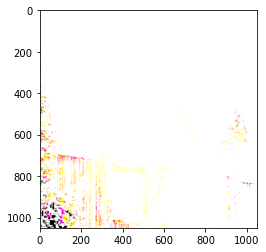

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import cv2
def adjust_color_balance(image, alpha=1.2, beta=10):
    result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return np.clip(result, 0, 255).astype(np.uint8)

def gamma_correction(image, gamma=1.2):
    table = np.array([((i / 255.0) ** (1.0 / gamma)) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def preprocess_image(image):
    # Apply your custom preprocessing steps
    image = adjust_color_balance(image, alpha=1.2, beta=10)
    image = gamma_correction(image, gamma=1.2)
    image = cv2.medianBlur(image, 3)  # Uncomment if you want to apply median blur
    return image

# Load an example image
img_path = r"C:\Users\gupta\Desktop\Eyantra_GG(2023)\geoguide_1306\Task_2B\training\Fire\81.jpg"
img = image.load_img(img_path)

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Apply custom preprocessing
# img_array = adjust_color_balance(img_array, alpha=1.2, beta=10)
# img_array = gamma_correction(img_array, gamma=1.2)
# img_array = cv2.medianBlur(img_array, 3)  # Uncomment if you want to apply median blur

# Add an extra dimension and preprocess the input for VGG16
img_array = np.expand_dims(img_array, axis=0)
# img_array = preprocess_input(img_array)

# Display the preprocessed image
plt.imshow(img_array[0])
plt.show()


In [2]:
# ...

# Make predictions on test data
test_predictions = model.predict(test_generator)

# Print predicted probabilities for each class
print("Predicted Probabilities:")
print(test_predictions)

# Convert predictions to class labels
predicted_labels = [class_names[i] for i in np.argmax(test_predictions, axis=1)]

# Display the predicted class labels for each test image
for i, image_path in enumerate(test_generator.filepaths):
    filename = os.path.basename(image_path)
    class_name = predicted_labels[i]
    print(f"Image: {filename}, Predicted Class: {class_name}")


10/10 [==============================] - 1s 129ms/step
Predicted Probabilities:
[[9.92911041e-01 5.26108139e-04 3.82176077e-05 6.46373769e-03
  6.08649716e-05]
 [9.78283644e-01 1.47285391e-04 6.00530242e-04 2.08244696e-02
  1.44126228e-04]
 [2.69469838e-05 9.99913812e-01 4.86385534e-06 7.03069372e-06
  4.72923894e-05]
 [6.01065551e-07 9.99943018e-01 8.28067527e-07 7.37412904e-07
  5.48284152e-05]
 [1.20492163e-03 8.22759321e-05 9.98250425e-01 1.31958688e-04
  3.30484472e-04]
 [6.39594000e-05 1.92162770e-05 9.99900579e-01 3.73626744e-06
  1.24461039e-05]
 [3.90748377e-04 7.20346463e-07 7.15447895e-05 9.99515772e-01
  2.12488958e-05]
 [1.08971319e-03 3.00853018e-04 2.22294460e-04 9.94901299e-01
  3.48585332e-03]
 [7.34713860e-04 7.65984505e-03 8.55154125e-04 1.15404364e-04
  9.90634859e-01]
 [4.04481834e-05 1.79461800e-04 7.27231090e-05 7.42806078e-05
  9.99633074e-01]]
Image: combat1.jpeg, Predicted Class: combat
Image: combat2.jpeg, Predicted Class: combat
Image: building1.jpeg, Predic

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D

# Define class names and labels
class_names = ["combat", "destroyedbuilding", "fire", "humanitarianaid", "militaryvehicles"]
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

# Define image and batch size
image_size = (224, 224)  # Changed to match DenseNet201 input size
batch_size = 32

# Data augmentation and preprocessing
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    shear_range=0.3,  # Increased shear range
    zoom_range=0.3,  # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data_dir = "training"
test_data_dir = "testing"  # Updated path to the testing folder

train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=class_names
)

validation_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=class_names
)

# Build and compile the model (DenseNet201)
base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Changed to Global Average Pooling
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
for layer in base_model.layers[-10:]:  # Fine-tuning last few layers
    layer.trainable = True

# Training with a learning rate scheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    return 0.001 * np.exp(-epoch / 10)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
lr_callback = LearningRateScheduler(lr_scheduler)

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[lr_callback, early_stopping]
)

# Save the trained model
model.save("alien_attack_model.h5")

# Load the trained model for testing
model = keras.models.load_model("alien_attack_model.h5")

# Prepare the test data
test_data_gen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_data_gen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Make predictions on test data
test_predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = [class_names[i] for i in np.argmax(test_predictions, axis=1)]

# Display the predicted class labels for each test image
for i, image_path in enumerate(test_generator.filepaths):
    filename = os.path.basename(image_path)
    class_name = predicted_labels[i]
    print(f"Image: {filename}, Predicted Class: {class_name}")

Found 325 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Epoch 1/20
11/11 [==============================] - 51s 4s/step - loss: 1.4734 - accuracy: 0.4369 - val_loss: 0.4973 - val_accuracy: 0.8875 - lr: 0.0010
Epoch 2/20
11/11 [==============================] - 37s 3s/step - loss: 0.7671 - accuracy: 0.7138 - val_loss: 0.3367 - val_accuracy: 0.9125 - lr: 9.0484e-04
Epoch 3/20
11/11 [==============================] - 36s 3s/step - loss: 0.5056 - accuracy: 0.8185 - val_loss: 0.2746 - val_accuracy: 0.9125 - lr: 8.1873e-04
Epoch 4/20
11/11 [==============================] - 35s 3s/step - loss: 0.4724 - accuracy: 0.8462 - val_loss: 0.2298 - val_accuracy: 0.9250 - lr: 7.4082e-04
Epoch 5/20
11/11 [==============================] - 35s 3s/step - loss: 0.3656 - accuracy: 0.8738 - val_loss: 0.1009 - val_accuracy: 0.9625 - lr: 6.7032e-04
Epoch 6/20
11/11 [==============================] - 40s 4s/step - loss: 0.2959 - accuracy: 0.9108 - val_loss: 0.1898 - val_accuracy: 0.937

Found 320 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Epoch 1/20
10/10 [==============================] - 65s 5s/step - loss: 1.4902 - accuracy: 0.4187 - val_loss: 0.7569 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 40s 4s/step - loss: 0.7599 - accuracy: 0.7406 - val_loss: 0.4078 - val_accuracy: 0.8500 - lr: 9.0484e-04
Epoch 3/20
10/10 [==============================] - 40s 4s/step - loss: 0.6702 - accuracy: 0.7437 - val_loss: 0.3074 - val_accuracy: 0.9000 - lr: 8.1873e-04
Epoch 4/20
10/10 [==============================] - 41s 4s/step - loss: 0.5440 - accuracy: 0.8125 - val_loss: 0.3719 - val_accuracy: 0.8875 - lr: 7.4082e-04
Epoch 5/20
10/10 [==============================] - 40s 4s/step - loss: 0.3964 - accuracy: 0.8656 - val_loss: 0.3229 - val_accuracy: 0.8625 - lr: 6.7032e-04
Epoch 6/20
10/10 [==============================] - 41s 4s/step - loss: 0.3775 - accuracy: 0.8594 - val_loss: 0.2539 - val_accuracy: 0.925

error: OpenCV(4.8.1) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x11a46be7::Set<3,4,-1>,struct cv::impl::A0x11a46be7::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


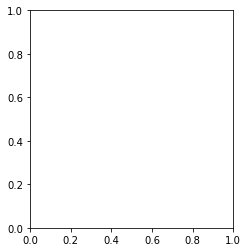

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D
import cv2
import matplotlib.pyplot as plt

# Define class names and labels
class_names = ["combat", "destroyedbuilding", "fire", "humanitarianaid", "militaryvehicles"]
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

# Define image and batch size
image_size = (200, 200)  # Adjusted resolution
batch_size = 32

# Data augmentation and preprocessing
train_data_gen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    rescale=1./255  # Rescale the pixel values to the range [0, 1]
)

# Only rescale for testing data
test_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=class_names
)

validation_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=class_names
)

# Build and compile the model (DenseNet201)
base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(200, 200, 3))
for layer in base_model.layers:
    layer.trainable = False

model = keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Training with a learning rate scheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    return 0.001 * np.exp(-epoch / 10)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
lr_callback = LearningRateScheduler(lr_scheduler)

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[lr_callback, early_stopping]
)

# Save the trained model
model.save("alien_attack_model.h5")

# Load the trained model for testing
model = keras.models.load_model("alien_attack_model.h5")

# Prepare a sample testing image for visualization
test_img_path = r"C:\Users\gupta\Desktop\Eyantra_GG(2023)\Task_2B\testing\fire\fire1.jpeg"
test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (200, 200))  # Resize the image to the model's input size
test_img = test_img / 255.0  # Normalize pixel values

# Visualize the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Preprocess the image and make predictions
processed_img = test_img[np.newaxis, ...]
predicted_probabilities = model.predict(processed_img)
predicted_class = np.argmax(predicted_probabilities)
predicted_label = class_names[predicted_class]

# Visualize the processed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.title(f'Processed Image\nPredicted Class: {predicted_label}')
plt.show()


Found 320 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20
10/10 [==============================] - 24s 2s/step - loss: 1.2178 - accuracy: 0.5750 - val_loss: 1.2915 - val_accuracy: 0.6625 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 12s 1s/step - loss: 0.4851 - accuracy: 0.8469 - val_loss: 0.6756 - val_accuracy: 0.7750 - lr: 9.0484e-04
Epoch 3/20
10/10 [==============================] - 13s 1s/step - loss: 0.4234 - accuracy: 0.8562 - val_loss: 0.4668 - val_accuracy: 0.8625 - lr: 8.1873e-04
Epoch 4/20
10/10 [==============================] - 13s 1s/step - loss: 0.2616 - accuracy: 0.8906 - val_loss: 1.0742 - val_accuracy: 0.7750 - lr: 7.4082e-04
Epoch 5/20
10/10 [==============================] - 13s 1s/step - loss: 0.2826 - accuracy: 0.9125 - val_loss: 0.9105 - val_accuracy: 0.7750 - lr: 6.7032e-04
Epoch 6/20
10/10 [==============================] - 13s 1s/step - loss: 0.2

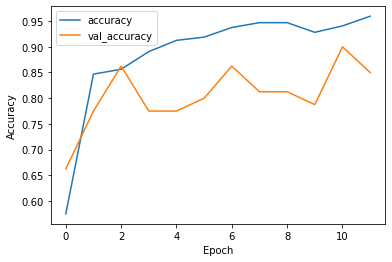

Found 10 images belonging to 5 classes.
10/10 [==============================] - 1s 46ms/step
Image: combat1.jpeg, Predicted Class: combat
Image: combat2.jpeg, Predicted Class: combat
Image: building1.jpeg, Predicted Class: destroyedbuilding
Image: building2.jpeg, Predicted Class: destroyedbuilding
Image: fire1.jpeg, Predicted Class: fire
Image: fire2.jpeg, Predicted Class: fire
Image: rehab1.jpeg, Predicted Class: humanitarianaid
Image: rehab2.jpeg, Predicted Class: destroyedbuilding
Image: military1.jpeg, Predicted Class: militaryvehicles
Image: military2.jpeg, Predicted Class: militaryvehicles


In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
import matplotlib.pyplot as plt

# Define class names and labels
class_names = ["combat", "destroyedbuilding", "fire", "humanitarianaid", "militaryvehicles"]
class_labels = {class_name: i for i, class_name in enumerate(class_names)}

# Define image and batch size
image_size = (224, 224)
batch_size = 32

# Data augmentation and preprocessing
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data_dir = "training"
test_data_dir = "testing"

train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    classes=class_names
)

validation_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=class_names
)

# Build and compile the model (MobileNetV2)
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

# Fine-tune the model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Training with a learning rate scheduler
def lr_scheduler(epoch):
    return 0.001 * np.exp(-epoch / 10)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
lr_callback = LearningRateScheduler(lr_scheduler)

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[lr_callback, early_stopping]
)

# Save the trained model
model.save("alien_attack_model.h5")

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Load the trained model for testing
model = keras.models.load_model("alien_attack_model.h5")

# Prepare the test data
test_data_gen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_data_gen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Make predictions on test data
test_predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = [class_names[i] for i in np.argmax(test_predictions, axis=1)]

# Display the predicted class labels for each test image
for i, image_path in enumerate(test_generator.filepaths):
    filename = os.path.basename(image_path)
    class_name = predicted_labels[i]
    print(f"Image: {filename}, Predicted Class: {class_name}")


In [10]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
image_size = (224, 224)
batch_size = 1

# Load the trained model
model = tf.keras.models.load_model("alien_attack_model.h5")

# Prepare the training data
train_data_gen = ImageDataGenerator(rescale=1.0 / 255)
train_generator = train_data_gen.flow_from_directory(
    "training",
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

# Make predictions on training data
train_predictions = model.predict(train_generator)

# Convert predictions to class labels
predicted_labels = [os.path.basename(os.path.dirname(path)) for path in train_generator.filepaths]

# Get true labels
true_labels = [os.path.basename(os.path.dirname(path)) for path in train_generator.filepaths]

# Generate and print the classification report
print("Classification Report (Training Data):")
print(classification_report(true_labels, predicted_labels))

# Generate and print the confusion matrix
print("Confusion Matrix (Training Data):")
print(confusion_matrix(true_labels, predicted_labels))



Found 400 images belonging to 5 classes.
400/400 [==============================] - 38s 90ms/step
Classification Report (Training Data):
                   precision    recall  f1-score   support

           Combat       1.00      1.00      1.00        80
             Fire       1.00      1.00      1.00        80
destroyedbuilding       1.00      1.00      1.00        80
  humanitarianaid       1.00      1.00      1.00        80
 militaryvehicles       1.00      1.00      1.00        80

         accuracy                           1.00       400
        macro avg       1.00      1.00      1.00       400
     weighted avg       1.00      1.00      1.00       400

Confusion Matrix (Training Data):
[[80  0  0  0  0]
 [ 0 80  0  0  0]
 [ 0  0 80  0  0]
 [ 0  0  0 80  0]
 [ 0  0  0  0 80]]
